In [1]:
import sys
import os
import random

sys.path.append('..')

from PIL import ImageFont

from comic_ocr.types import Size
from comic_ocr.utils.files import load_images, load_texts, get_path_project_dir
from comic_ocr.utils.plotting import show_images

# Generate Manga Dataset


## Prepare the data for generator 

In [2]:
generator_input_dir = get_path_project_dir('data/')

print(os.path.abspath(generator_input_dir))
print(os.listdir(generator_input_dir))

/Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data
['init_image_data.py', '.DS_Store', 'manga_line_annotated', 'drawings', 'output', 'others', 'manga_line_init', 'manga_unannotated', 'logs', 'manga_line_annotated_no_text', 'train', 'text', 'fonts']


### Prepare the data for generator > Drawings

choices_drawings 77


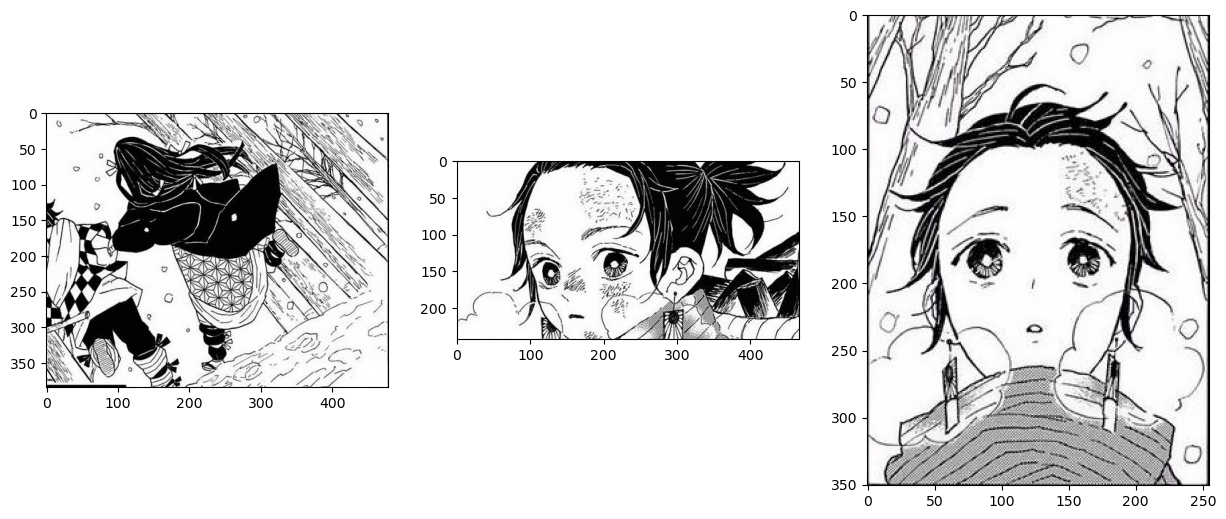

In [3]:
choices_drawings, _ = load_images(generator_input_dir + '/drawings/*')

print('choices_drawings', len(choices_drawings))
show_images(choices_drawings[:3])

### Prepare the data for generator > Fonts

In [4]:
choices_fonts = [] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=22)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool_Cat.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool_Cat.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool_Cat.ttf', size=21)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=23)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=28)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Display.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Display.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=24)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Mendalion.otf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Queensides.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/TheRifleman.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Sweet_Iced_Coffee.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/SF_Cartoonist_Hand.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/SF_Cartoonist_Hand.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Warung_Kopi.otf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Warung_Kopi.otf', size=20)]

print('choices_fonts', len(choices_fonts))

choices_fonts 30


### Prepare the data for generator > Texts (or Quotes)

In [5]:
choices_texts = load_texts(generator_input_dir + '/text/texts.txt')
choices_texts = [text for text in choices_texts if len(text) < 60]

upper_cases = [text.upper() for text in choices_texts if len(text) < 10]
choices_texts = choices_texts + upper_cases

print('choices_texts', len(choices_texts))
print(choices_texts[:15])
print(choices_texts[-15:])

choices_texts 7675
['0', '456', '123', '789', '864', 'Liuyuan, did anything happen?', 'No, everything is fine.', 'OK.', 'It will be useful for you in the future,', 'I want to go out to hunt too.', 'Phew!', 'acted up.', 'palace', 'I came to this quickly?', 'Give your catch to me—']
['YES.', 'POTATOES,', 'NO.', 'NO.', 'ALRIGHT.', 'NO.', 'PFFT.', 'WAIT,', 'WHAT?', 'GUESS.', 'WHATEVER!', 'ALRIGHT.', "LET'S GO.", 'YES.', 'WE WAIT.']


## Create Generator

In [6]:
from comic_ocr.dataset.generated_manga import MangaGenerator

In [7]:
generator = MangaGenerator.create(
    choices_drawings=choices_drawings,
    choices_texts=choices_texts,
    choices_fonts=choices_fonts,
    choices_text_counts=[3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7],
    random_salt='ab')

image, texts = generator.generate(output_size=(750, 500), random_seed='1')
print(image)
print(texts)
show_images(image)

<PIL.Image.Image image mode=RGB size=750x500 at 0x7FE200648640>
[TextBubble(xy=(470, 77), text='Why?'), TextBubble(xy=(334, 254), text='Sir, are your men in the private army?'), TextBubble(xy=(31, 361), text='Yes, I did!'), TextBubble(xy=(405, 377), text="You dare to ask what's the matter?"), TextBubble(xy=(255, 37), text="Who says I'm angry?"), TextBubble(xy=(189, 188), text='No, I was thinking of something else.'), TextBubble(xy=(599, 144), text='Explosive Poker')]


In [8]:
image, texts = generator.generate(output_size=(750, 500))
show_images(image)

## Create dataset

In [9]:
from comic_ocr.dataset.generated_manga import create_dataset

create_dataset(
    generator=generator,
    dataset_dir=get_path_project_dir('data/output/generate_manga_dataset'),
    output_size=Size.of(750, 1500),
    output_count=500,
)

# Generate Single Line Dataset

## Prepare the data for generator 

In [10]:
choices_fonts = [] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool_Cat.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Display.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Mendalion.otf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Queensides.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/TheRifleman.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Sweet_Iced_Coffee.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/SF_Cartoonist_Hand.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Warung_Kopi.otf', size=20)]

print('choices_fonts', len(choices_fonts))

choices_fonts 14


In [11]:
choices_texts = load_texts(generator_input_dir + '/text/texts.txt')
choices_texts = [text for text in choices_texts if len(text) < 100]

print('choices_texts', len(choices_texts))
print(choices_texts[:10])


max_length = 15
choices_texts = [c for c in choices_texts if len(c) < max_length]
choices_texts = choices_texts + [c.upper() for c in choices_texts]


print('choices_texts', len(choices_texts))
print(choices_texts[:5])
print(choices_texts[-5:])

choices_texts 8881
['0', '456', '123', '789', '864', 'Liuyuan, did anything happen?', 'No, everything is fine.', "Hmm, what exactly is this sickness you're experiencing in your head?", "Even the town's doctor can't diagnose what's wrong with you?", "You don't have to worry about such things. What I'm experiencing is not a sickness."]
choices_texts 3282
['0', '456', '123', '789', '864']
['WE WAIT.', 'HAD A DREAM?', 'WHAT BUSINESS?', 'SHALL WE GO?', 'OF COURSE NOT!']


In [12]:
from comic_ocr.dataset.generated_single_line import SingleLineGenerator

<PIL.Image.Image image mode=RGB size=82x33 at 0x7FE208D50C70>
Not at all.


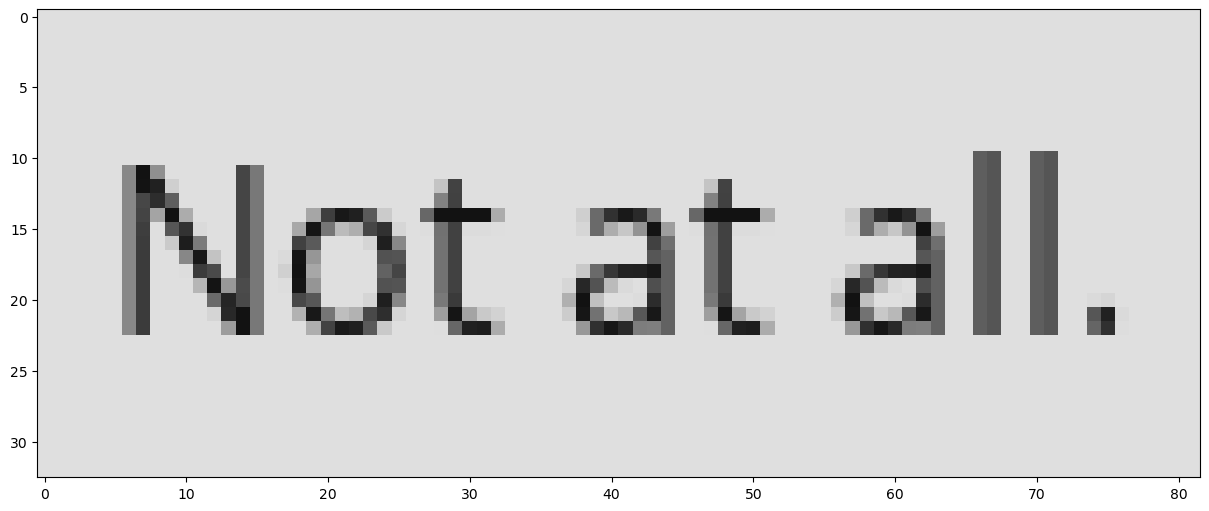

In [13]:
choices_background_colors=('#ffffff', '#dfdfdf', '#eeeeee', '#fafafa')
choices_text_colors=('#000000', '#333333', '#121212', '#444444', '#555555')

generator = SingleLineGenerator.create(
    choices_texts=choices_texts,
    choices_fonts=choices_fonts,
    choices_background_colors=choices_background_colors,
    choices_text_colors=choices_text_colors,
    random_salt='ab')

image, text = generator.generate(random_seed='1')
print(image)
print(text)
show_images(image)

In [14]:
from comic_ocr.dataset.generated_single_line import create_dataset

create_dataset(
    generator=generator,
    dataset_dir=get_path_project_dir('data/output/generate_single_line_dataset'),
    output_count=1000,
)